# Convolution用法

tf.Tensor(
[[[[-1.]]

  [[-1.]]

  [[-1.]]]


 [[[-1.]]

  [[ 8.]]

  [[-1.]]]


 [[[-1.]]

  [[-1.]]

  [[-1.]]]], shape=(3, 3, 1, 1), dtype=float32)


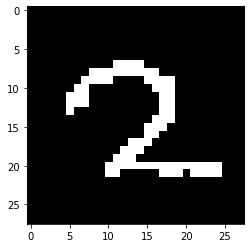

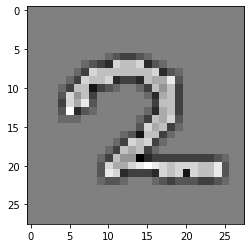

In [1]:
%matplotlib inline
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

temp = np.array([ [-1, -1, -1],
                  [-1,  8, -1],
                  [-1, -1, -1] ], dtype='float32')

# change kernel to 4D tensor
kernel = tf.reshape(tf.Variable(temp), [3, 3, 1, 1]) # 1 個 3*3*1的濾波器
print(kernel) 

raw_image = cv2.imread('test_img.jpg', 0)
_, threshold_image = cv2.threshold(raw_image, 0, 255, cv2.THRESH_OTSU) # 變黑白照片

threshold_image= threshold_image.astype('float32')

# change image to 4D tensor for  Convolution
# image & kernal 必須是 4D，才能用 tf.nn.conv2d
x_img = tf.reshape(threshold_image, [-1, threshold_image.shape[0], threshold_image.shape[1], 1])
# strides=[1, 1, 1, 1] 第一個與第四個1 不動，第二個1 表示Kernal 水平位移1，第三個1 表示Kernal 垂直位移1
# padding='SAME' 自動補零
# x_img & kernel 必須是4D
y_conv = tf.nn.conv2d(x_img, kernel, strides=[1, 1, 1, 1], padding='SAME') 

result_img = np.reshape(y_conv, [threshold_image.shape[0], threshold_image.shape[1]])
    
plt.imshow(threshold_image, cmap='gray')
plt.show()
    
plt.imshow(result_img, cmap='gray')
plt.show()

# Maxpooling用法

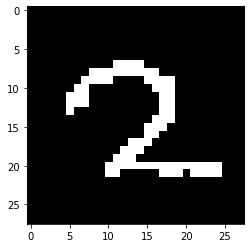

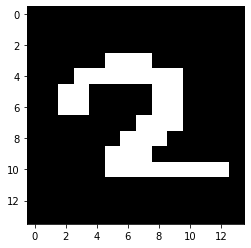

In [2]:
%matplotlib inline
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt


raw_image = cv2.imread('test_img.jpg', 0)
_, threshold_image = cv2.threshold(raw_image, 0, 255, cv2.THRESH_OTSU)

threshold_image= threshold_image.astype('float32')

# change image to 4D tensor
x_img = tf.reshape(threshold_image, [-1, threshold_image.shape[0], threshold_image.shape[1], 1])

# ksize = [1, width, height, 1]
# strides = [1, horizontal strides, vertical strides, 1]
y_maxpool = tf.nn.max_pool(x_img, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')


result_img = np.reshape(y_maxpool, [14, 14])
    
plt.imshow(threshold_image, cmap='gray')
plt.show()
    
plt.imshow(result_img, cmap='gray')
plt.show()

# 創建CNN網路架構

In [5]:
from tensorflow.keras import layers
from tensorflow import keras
import tensorflow as tf
tf.compat.v1.reset_default_graph()

class CNN(tf.keras.Model):
    def __init__(self):
        super().__init__()
        self.conv1 = tf.keras.layers.Conv2D(
            filters=32,             # 卷積層神經元（卷積核）數目
            kernel_size=[5, 5],     # 接受區的大小
            padding='same',         # padding策略（vaild 或 same）
            activation=tf.nn.relu   # 激活函数

        )
        self.pool1 = tf.keras.layers.MaxPool2D(pool_size=[2, 2], strides=2)
        self.conv2 = tf.keras.layers.Conv2D(
            filters=64,
            kernel_size=[5, 5],
            padding='same',
            activation=tf.nn.relu
        )
        self.pool2 = tf.keras.layers.MaxPool2D(pool_size=[2, 2], strides=2)
        self.flatten = tf.keras.layers.Reshape(target_shape=(7 * 7 * 64,))
        self.dense1 = tf.keras.layers.Dense(units=1024, activation=tf.nn.relu)
        self.dense2 = tf.keras.layers.Dense(units=10)

    def call(self, inputs):
        x = self.conv1(inputs)                  # [batch_size, 28, 28, 32]
        x = self.pool1(x)                       # [batch_size, 14, 14, 32]
        x = self.conv2(x)                       # [batch_size, 14, 14, 64]
        x = self.pool2(x)                       # [batch_size, 7, 7, 64]
        x = self.flatten(x)                     # [batch_size, 7 * 7 * 64]
        x = self.dense1(x)                      # [batch_size, 1024]
        x = self.dense2(x)                      # [batch_size, 10]
        output = tf.nn.softmax(x)
        return output

model = CNN()
model.build(input_shape=(None,28, 28, 1))
print(model.summary())

Model: "cnn"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             multiple                  832       
                                                                 
 max_pooling2d (MaxPooling2D  multiple                 0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           multiple                  51264     
                                                                 
 max_pooling2d_1 (MaxPooling  multiple                 0         
 2D)                                                             
                                                                 
 reshape (Reshape)           multiple                  0         
                                                                 
 dense (Dense)               multiple                  3212288 

# 創建CNN網路架構(keras)

In [6]:
from tensorflow.keras import layers
from tensorflow import keras
import tensorflow as tf
tf.compat.v1.reset_default_graph()

model = tf.keras.Sequential()
model.add(layers.Conv2D(input_shape=(28, 28, 1),
                        filters=32, kernel_size=(3,3), strides=(1,1), padding='same',
                       activation='relu'))

model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 32)                200736    
                                                                 
 dense_1 (Dense)             (None, 10)                330       
                                                                 
Total params: 201,386
Trainable params: 201,386
Non-trainable params: 0
__________________________________________________